In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Change this import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

# Show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import the data
df = pd.read_csv('diabetes_prediction_dataset.csv')

# count_0 = df['diabetes'].value_counts()[0]
# count_1 = df['diabetes'].value_counts()[1]
# 
# # Randomly sample rows with 'diabetes' value 0 to match the count of 1s
# if count_0 > count_1:
#     df = pd.concat([df[df['diabetes'] == 0].sample(n=count_1, random_state=42), df[df['diabetes'] == 1]])
# elif count_1 > count_0:
#     df = pd.concat([df[df['diabetes'] == 1].sample(n=count_0, random_state=42), df[df['diabetes'] == 0]])
# 
# # randomly delete columns with bmi level of 27.32 until 250 samples left
# while len(df[df['bmi'] == 27.32]) > 200:
#     df = df.drop(df[df['bmi'] == 27.32].sample(n=1, random_state=42).index)


label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])

# Shuffle the DataFrame to mix the rows
 #df = df.sample(frac=1, random_state=42)

# # duplicate the rows with diabetes value 1 where bmi is higher than 35 and where gender is male
# condition1 = (df['diabetes'] == 1) & (df['bmi'] > 35)
# df = pd.concat([df, df.loc[condition1]])
# condition1 = (df['diabetes'] == 1) & (df['bmi'] > 35)
# df = pd.concat([df, df.loc[condition1]])
# 
# 
# condition2 = (df['diabetes'] == 1) & (df['gender_encoded'] == 1)
# df = pd.concat([df, df.loc[condition2]])
# condition2 = (df['diabetes'] == 1) & (df['gender_encoded'] == 1)
# df = pd.concat([df, df.loc[condition2]])


df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,0,4
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,1,4
3,Female,36.0,0,0,current,23.45,5.0,155,0,0,1
4,Male,76.0,1,1,current,20.14,4.8,155,0,1,1


C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


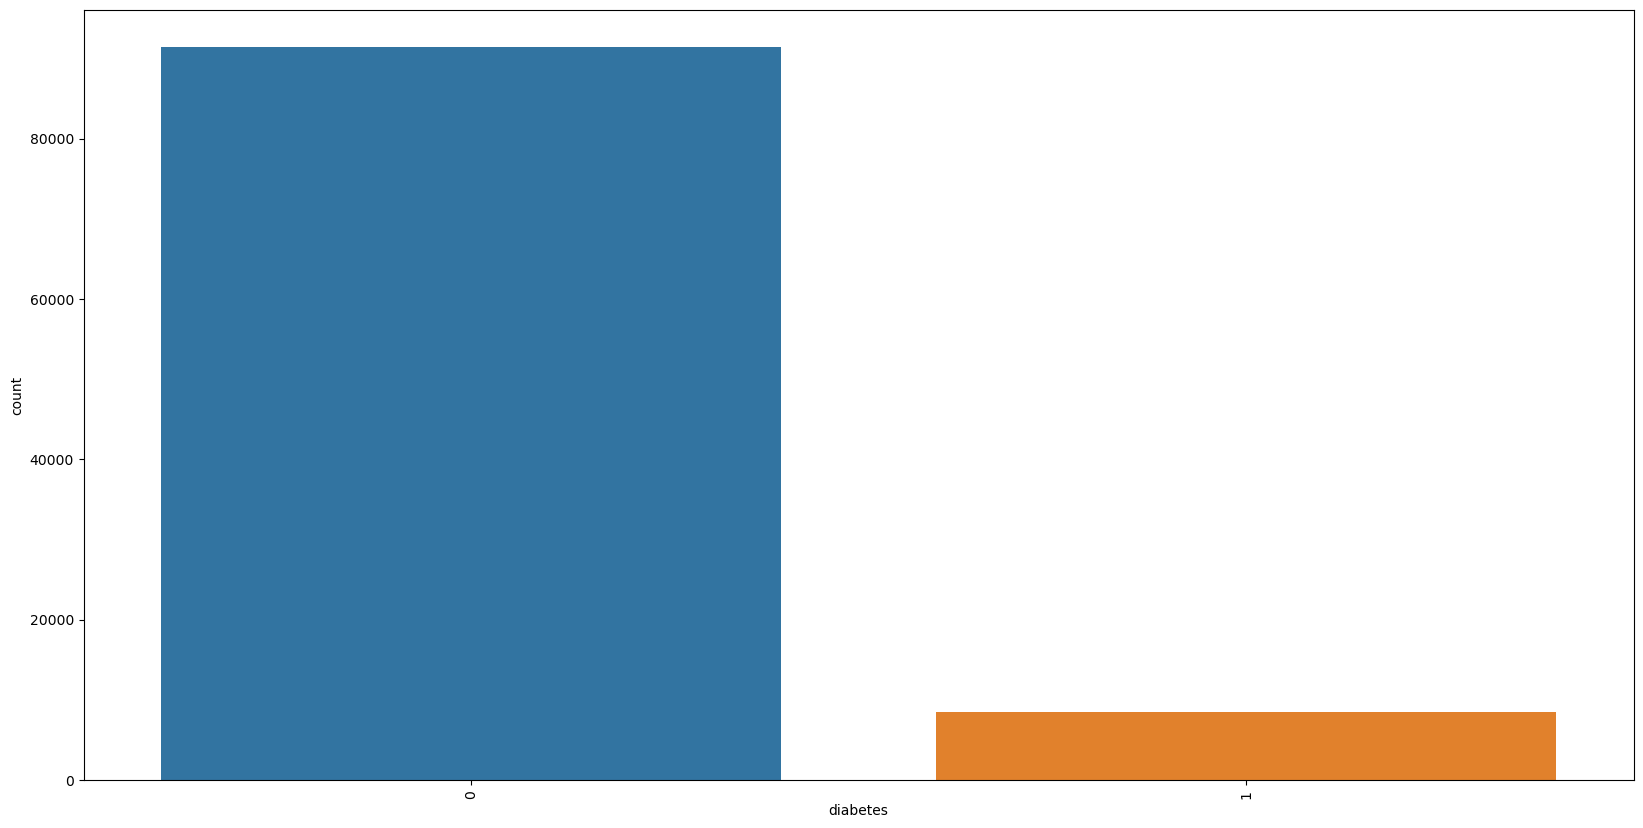

C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

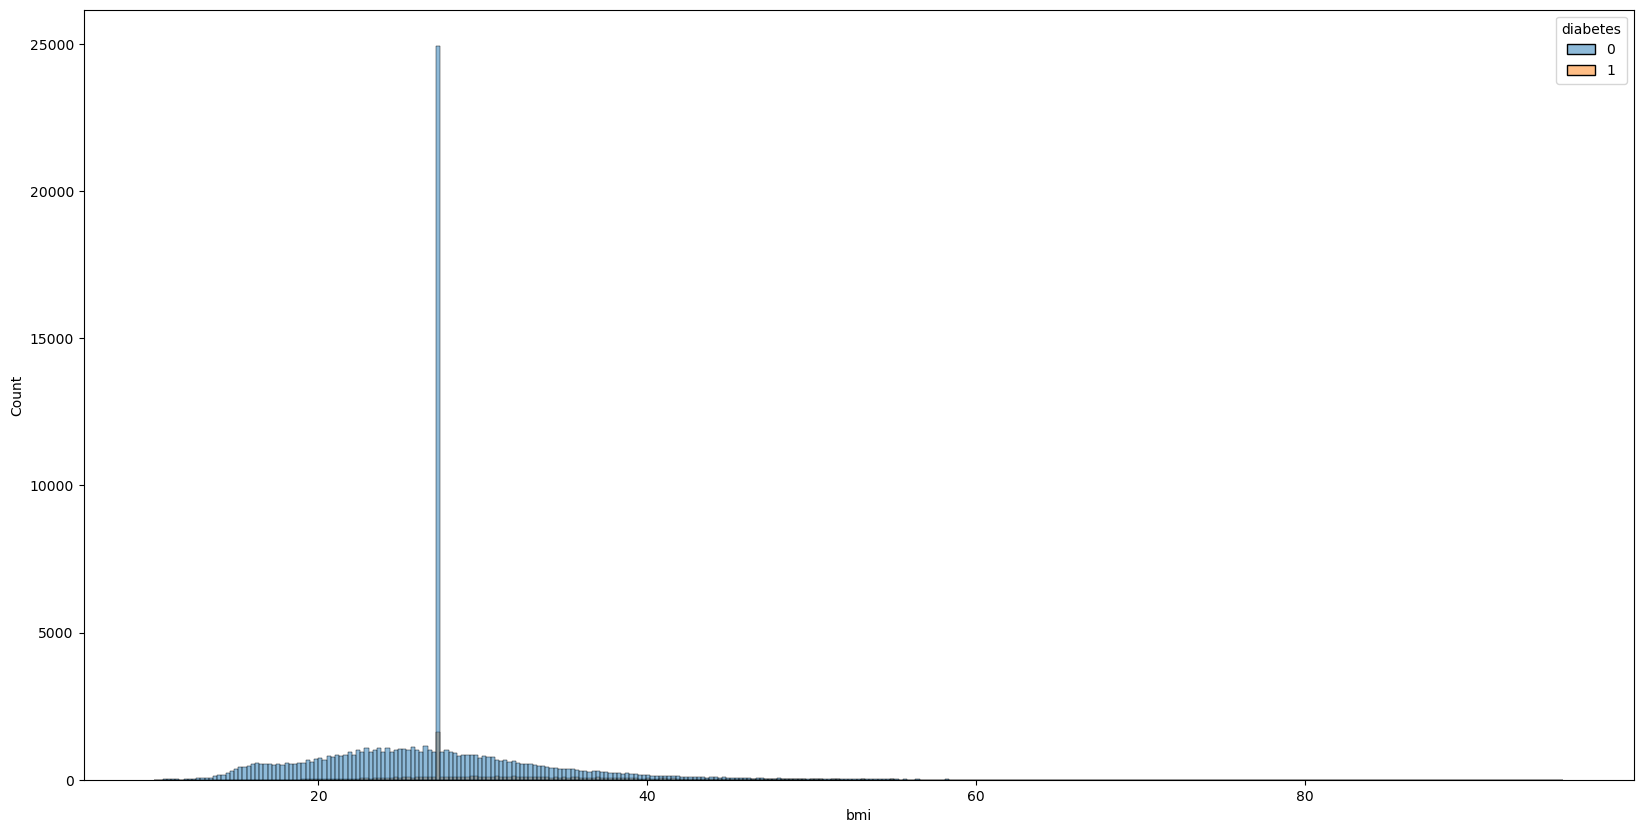

C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

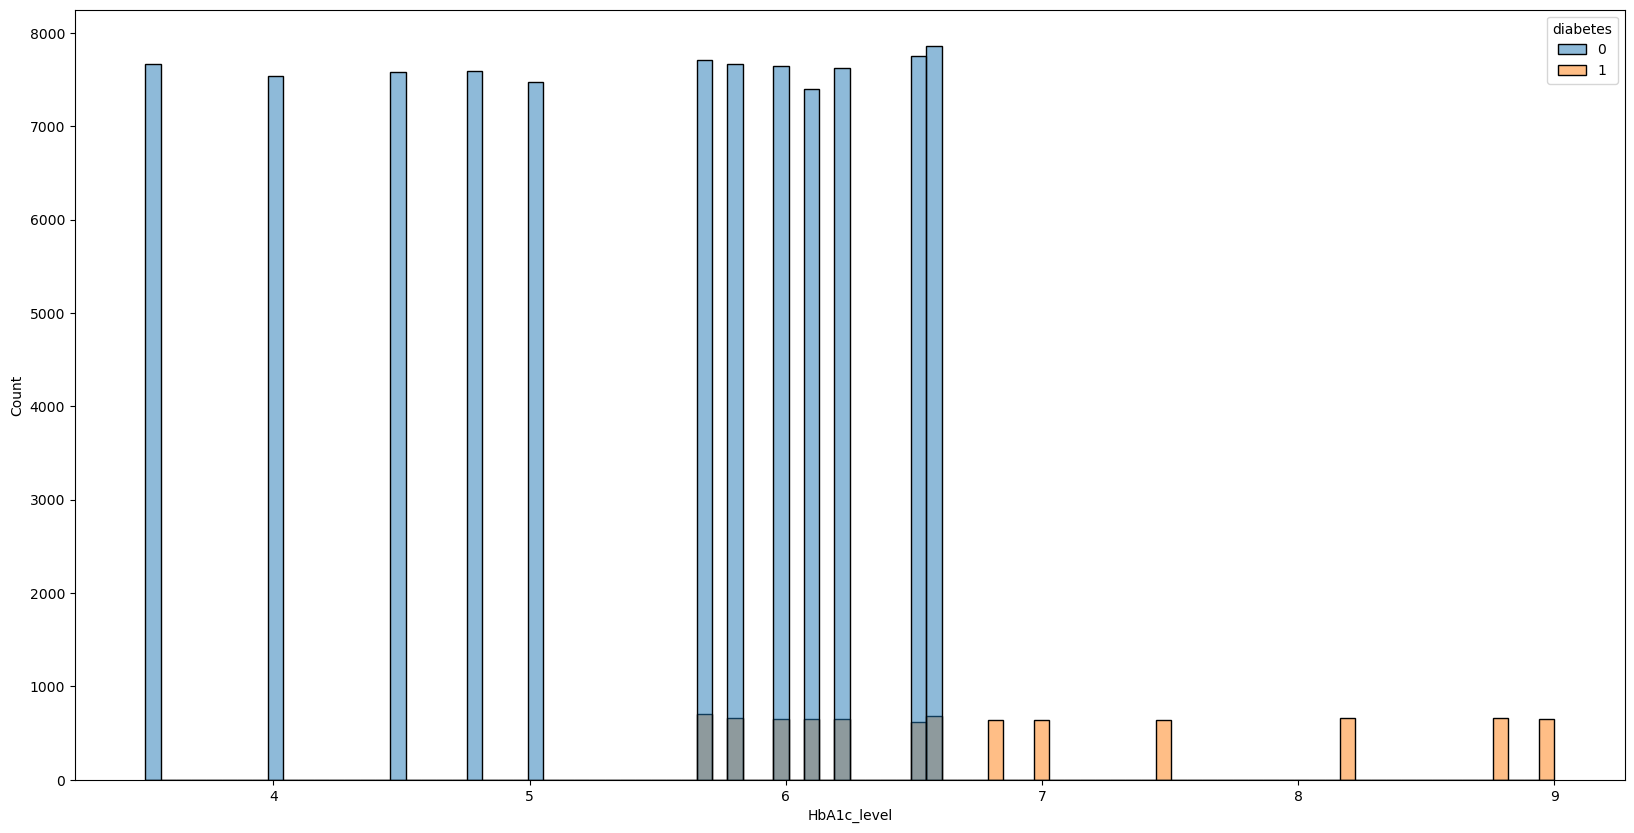

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='diabetes')
plt.xticks(rotation=90)
plt.show()

# Histogram of bmi
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='bmi', hue='diabetes')
plt.show()

plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='HbA1c_level', hue='diabetes')
plt.show()

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,-0.030656,0.228608
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,0.014203,0.093177
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,0.077696,0.027598
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,-0.022994,0.179361
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,0.019957,0.037369
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,0.017199,0.040219
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,0.037411,0.094290
gender_encoded,-0.030656,0.014203,0.077696,-0.022994,0.019957,0.017199,0.037411,1.000000,-0.077919
smoking_history_encoded,0.228608,0.093177,0.027598,0.179361,0.037369,0.040219,0.094290,-0.077919,1.000000


In [28]:
# Split data into test and train
train, test = train_test_split(df, test_size=0.3, random_state=42)


# Split data into X and y

X_train = train[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_train = train['diabetes']

X_test = test[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_test = test['diabetes']

In [29]:
model = Sequential(
    [
        Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [30]:
# load model
#from tensorflow.keras.models import load_model
#model = load_model('diabetes_model_1500.keras')
#
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [32]:
history = model.fit(
    X_train,
    y_train,
    epochs=300,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/300
547/547 [==============================] - 15s 27ms/step - loss: 0.2313 - accuracy: 0.9252 - auc: 0.8007 - mean_squared_error: 0.0624 - val_loss: 0.2100 - val_accuracy: 0.9292 - val_auc: 0.8556 - val_mean_squared_error: 0.0578
Epoch 2/300
547/547 [==============================] - 4s 8ms/step - loss: 0.2021 - accuracy: 0.9319 - auc: 0.8586 - mean_squared_error: 0.0554 - val_loss: 0.1802 - val_accuracy: 0.9408 - val_auc: 0.9159 - val_mean_squared_error: 0.0491
Epoch 3/300
547/547 [==============================] - 4s 7ms/step - loss: 0.1795 - accuracy: 0.9386 - auc: 0.8950 - mean_squared_error: 0.0495 - val_loss: 0.1508 - val_accuracy: 0.9487 - val_auc: 0.9351 - val_mean_squared_error: 0.0414
Epoch 4/300
547/547 [==============================] - 3s 5ms/step - loss: 0.1566 - accuracy: 0.9461 - auc: 0.9239 - mean_squared_error: 0.0435 - val_loss: 0.1364 - val_accuracy: 0.9559 - val_auc: 0.9541 - val_mean_squared_error: 0.0367
Epoch 5/300
547/547 [=============================

938/938 [==============================] - 3s 3ms/step - loss: 0.0830 - accuracy: 0.9712 - auc: 0.9774 - mean_squared_error: 0.0235


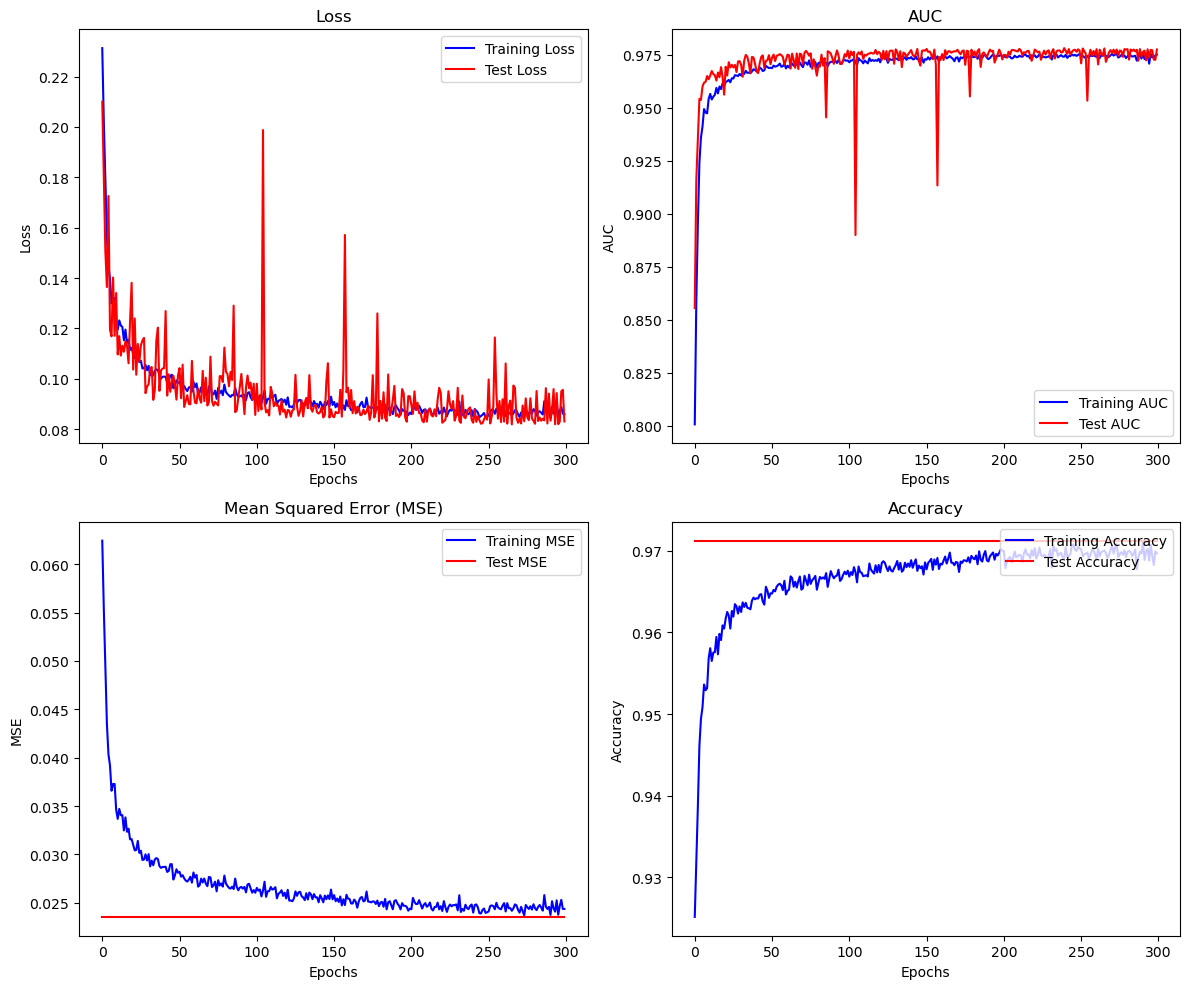

Test Loss: 0.0830235406756401


In [33]:
test_loss, test_accuracy, test_auc, test_mean_squared_error = model.evaluate(X_test, y_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training and Test Loss
axes[0, 0].plot(history.history["loss"], label='Training Loss', color='b')
axes[0, 0].plot(history.history["val_loss"], label='Test Loss', color='r')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(loc='upper right')

# Plot Training and Test AUC
axes[0, 1].plot(history.history["auc"], label='Training AUC', color='b')
axes[0, 1].plot(history.history["val_auc"], label='Test AUC', color='r')
axes[0, 1].set_title('AUC')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('AUC')
axes[0, 1].legend(loc='lower right')

# Plot Training and Test Mean Squared Error (MSE)
axes[1, 0].plot(history.history["mean_squared_error"], label='Training MSE', color='b')
axes[1, 0].plot([test_mean_squared_error] * len(history.history["mean_squared_error"]), label='Test MSE', color='r')
axes[1, 0].set_title('Mean Squared Error (MSE)')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend(loc='upper right')

# Plot Training and Test Accuracy
axes[1, 1].plot(history.history["accuracy"], label='Training Accuracy', color='b')
axes[1, 1].plot([test_accuracy] * len(history.history["accuracy"]), label='Test Accuracy', color='r')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()
print("Test Loss:", test_loss)

model.save("diabetes_bad_model.keras")


938/938 [==============================] - 2s 2ms/step
[[3.3733952e-03]
 [6.2173160e-05]
 [2.7475822e-11]
 ...
 [8.4239547e-25]
 [7.7028796e-02]
 [4.3962466e-11]]


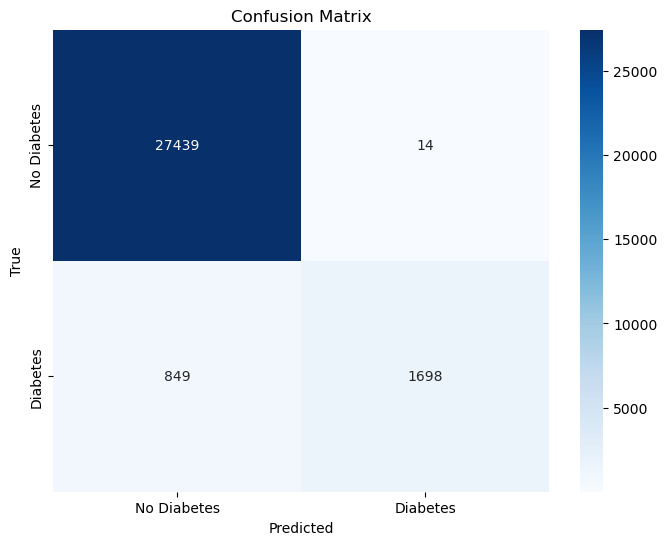

In [34]:
from sklearn.metrics import confusion_matrix

# Make predictions using your model on the test data
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)  # Threshold predictions to convert probabilities to binary values (0 or 1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [36]:
#predict the first value of the dataset
print(model.predict(X_test[:1]))
print(y_test[:1])

1/1 [==============================] - 0s 37ms/step
[[0.00337339]]
75721    0
Name: diabetes, dtype: int64


In [37]:
import shap

shap.initjs()

explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])
shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [38]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])

In [39]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100,:], nsamples=500)

100%|██████████| 50/50 [00:07<00:00,  6.59it/s]


In [40]:
shap.force_plot(explainer.expected_value, shap_values50[0], X_train.iloc[50:100,:])

In [41]:
import bz2
import pickle

with bz2.BZ2File("explainer_bad.bz2", "wb") as file:
    pickle.dump(explainer, file)